In [1]:
import pandas as pd
import csv

In [34]:
df_shop=pd.read_csv("shops.csv")
df_item=pd.read_csv("items.csv")
df_categories=pd.read_csv("item_categories.csv")
df_sales=pd.read_csv("sales_train.csv")

In [8]:
#see the first five records of shop dataset
df_shop.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
#we have 60 shops
df_shop.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


In [14]:
#see the first five records of items dataset
df_item.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [15]:
# 84 different categories. THAT MEANS each item has one category
df_item.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [18]:
#there are 84 different categories and no null value
df_item['item_category_id'].isna().sum()

0

In [30]:
df_sales['item_cnt_day'].describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [33]:
#item_cnt_day (min:-22 max:2169)
df_sales['item_cnt_day'].max()

2169.0

In [8]:
#see how many negative (count:7356; sum:7541)
df_sales[df_sales['item_cnt_day']<0].sum()

date              05.01.201323.01.201307.01.201302.01.201313.01....
date_block_num                                               107621
shop_id                                                      239177
item_id                                                    66071748
item_price                                               10614308.0
item_cnt_day                                                -7541.0
dtype: object

In [14]:
# store popularity(number&total revenue)
# df_sales=df_sales[df_sales['shop_id']!=0]item_cnt_day
df_sales.groupby(['shop_id']).sum().sort_values(by=['item_cnt_day'], ascending=False)[['item_cnt_day']].describe()

,item_cnt_day
count,60.000000
mean,60803.433333
std,57992.901750
min,330.000000
25%,23333.000000
50%,50176.000000
75%,69562.250000
max,310777.000000


In [25]:
df_sales.groupby(['shop_id']).sum().sort_values(by=['item_cnt_day'], ascending=False)[['item_cnt_day']].head(10)

,item_cnt_day
shop_id,
31,310777.0
25,241920.0
54,185790.0
28,184557.0
42,144934.0
57,141107.0
27,136657.0
6,100489.0
58,81734.0


sum (item_cnt_day)
1->31,25
2->54,28,42,37,27,6
3->(50k,100k)
4->(20k,50k)
5->(0-20k)

In [22]:
grouped=df_sales.groupby(['shop_id']).sum().sort_values(by=['item_cnt_day'], ascending=False)[['item_cnt_day']]
df_grouped = grouped.reset_index()

array([[<AxesSubplot:title={'center':'shop_id'}>,
        <AxesSubplot:title={'center':'item_cnt_day'}>]], dtype=object)

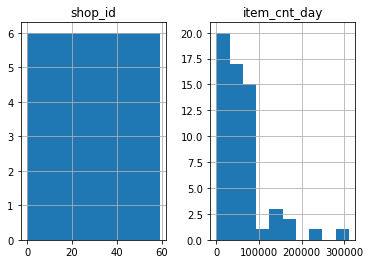

In [24]:
#
df_grouped.hist()

In [36]:
df_sales['total_revenue']=df_sales['item_price']*df_sales['item_cnt_day']

In [12]:
#total_revenue(max:235,217,000)
df_sales.groupby(['shop_id']).sum().sort_values(by=['total_revenue'], ascending=False)[['total_revenue']].head(5)

,total_revenue
shop_id,
31,2.352170e+08
25,2.164806e+08
28,1.597463e+08
42,1.519170e+08
54,1.419397e+08


In [39]:
grouped=df_sales.groupby(['shop_id']).sum().sort_values(by=['total_revenue'], ascending=False)[['total_revenue']]
df_grouped = grouped.reset_index()
df_grouped.describe()

,shop_id,total_revenue
count,60.000000,6.000000e+01
mean,29.500000,5.664877e+07
std,17.464249,4.980297e+07
min,0.000000,3.777140e+05
25%,14.750000,1.995826e+07
50%,29.500000,4.671987e+07
75%,44.250000,6.875614e+07
max,59.000000,2.352170e+08


array([[<AxesSubplot:title={'center':'shop_id'}>,
        <AxesSubplot:title={'center':'total_revenue'}>]], dtype=object)

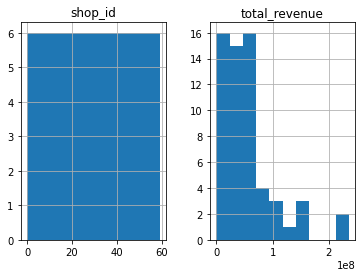

In [40]:
df_grouped.hist()

mean:56,648,770 
max:235m

In [42]:
#ASSUMPTION: people tend to buy more in shop with good price
#store avg price
df_sales.groupby(['shop_id']).mean().sort_values(by=['item_price'], ascending=True)[['item_price']].head(10)

,item_price
shop_id,
13,299.237067
51,491.877436
1,515.350652
0,563.444151
55,607.893809
32,641.581922
8,652.483208
23,721.404832
31,724.691619


<AxesSubplot:xlabel='date_block_num'>

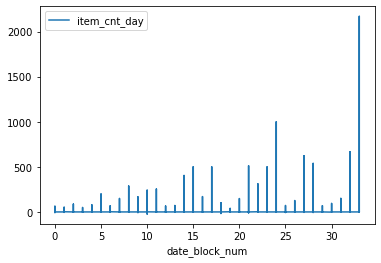

In [41]:
#seasonality
(14,15,17)(21-24)(35)
df_sales.plot('date_block_num','item_cnt_day')